# k-Nearst Neighbor

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib import cm
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors

# We do this to ignore several specific warnings
import warnings

In [2]:
# Set up Notebook
%reload_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="white")

In [3]:
# Import user defined modules
import utils as us

In [4]:
iris = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
113,5.7,2.5,5.0,2.0,virginica
30,4.8,3.1,1.6,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
74,6.4,2.9,4.3,1.3,versicolor


In [5]:
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
labels = np.array([i//50 for i in range(iris.shape[0])])
frac = 0.4

In [6]:
# We want to split our data into training and testing
# Note that we have both 'data' and 'labels'
d_train, d_test, l_train, l_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=frac, 
                                                    random_state=23)
    
# Now scale our data
# Create and fit scaler
sc = StandardScaler().fit(d_train)


In [7]:
d_train_sc = sc.transform(d_train)
d_test_sc = sc.transform(d_test)

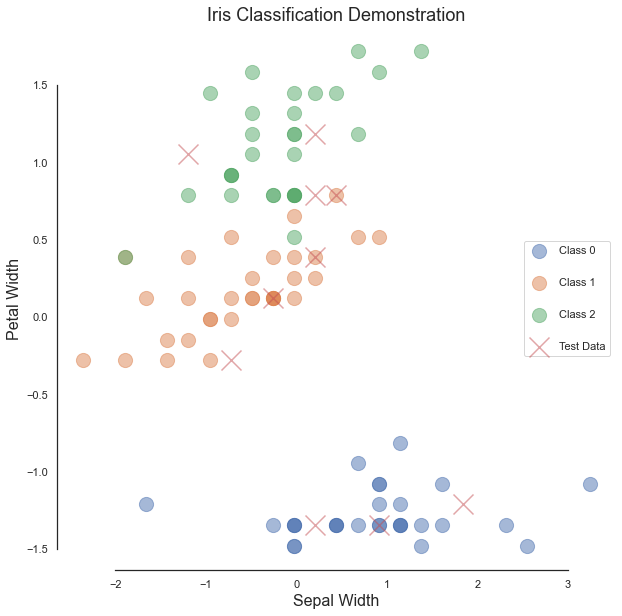

In [8]:
# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10, 10))

x = d_train_sc[:, 1]
y = d_train_sc[:, 3]
num_show = 10

for idx in np.unique(l_train):
    i = int(idx)
    ax.scatter(x[l_train == i], y[l_train == i], label=f'Class {i}',
                       s=200, alpha = .5, cmap=cm.coolwarm) 

xx = d_test_sc[:num_show, 1]
yy = d_test_sc[:num_show, 3]
ax.scatter(xx, yy, label='Test Data',
           marker='x', s=400, 
           alpha = .5, cmap=cm.coolwarm) 
        
# Decorate and clean plot
ax.set_xlabel('Sepal Width', fontsize=16)
ax.set_ylabel('Petal Width', fontsize=16)
ax.legend(loc = 7, labelspacing=2)
ax.set_title("Iris Classification Demonstration", fontsize=18)
sns.despine(offset=0, trim=True)

We can now apply the k-nn algorithm to the Iris data to create a classification model. The basic approach is simple, and follows the standard scikit-learn estimator philosophy:

1. Import the proper module, `neighbors`.
2. Create the estimator, `KNeighborsClassifier` and specify hyperparameters. In this case we need to specify the number of neighbors, but we can use the default weight, which is `uniform`.
3. Fit the model to the training data, note that by using our simple `get_iris_data` helper function we have loaded the Iris data, split the data into training and testing sets, and scaled all data by first normalizing the training data.
4. Predict new classes with our trained model (or in the simple demonstration below, generate a performance metric via the `score` method).

In [9]:
# The number of neighbors affects performance
nbrs = 5
# First we construct our model
knc = neighbors.KNeighborsClassifier(n_neighbors=nbrs)

# Now train our model
knc.fit(d_train_sc, l_train)

# Compute and display accuracy score
score = 100.0 * knc.score(d_test_sc, l_test)
print(f"KNN ({nbrs} neighbors) prediction accuracy = {score:5.1f}%")

KNN (5 neighbors) prediction accuracy =  96.7%


## Confusion Metrics

As previously demonstrated, we can call the `score` method on our k-nn classifier to compute and display a simple performance metric or value. In general however, there are a number of different  metrics that can be used to quantify the performance of a classification algorithm, and the `scikit-learn` prodes support to compute many of these metrics in the `metrics` module.

Another simple way to understand our performance is to create and display a `confusion matrix`. A confusion matrix has rows that correspond to the true labels and columns that correspond to the predicted labels. The elements of the confusion matrix contain the number of instances with true label given the row index and the predicted label by the column index.

In [10]:
from sklearn.metrics import confusion_matrix

# Generate predictions
l_pred = knc.predict(d_test_sc)

# Create and display confusion matrix
print(confusion_matrix(l_test, l_pred))

[[21  0  0]
 [ 0 18  0]
 [ 0  2 19]]


In this case, we see that the classifier only misclassifies two instances of Iris virginica as Iris versicolor. This type of visualization is a powerful technique to convey the performance of a machine classification.

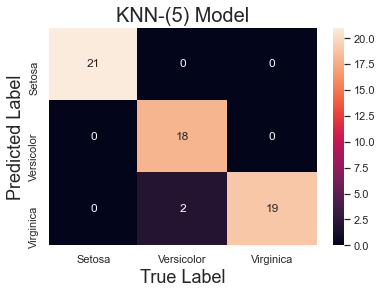

In [11]:
us.confusion(l_test, l_pred, f'KNN-({nbrs}) Model')

There are a number of other different scores, which one is most useful often depends on the nature of the classificatoin task.  
Commonly used scores are the *precision and the recall* and the *f1-score*, where the *f1-score* is simply the harmonic mean of the precision and the recall.

In the following code example, we also pass in a list of target names. If we didn't do this, the labels would simply be listed as Class 0, Class 1, and Class 2. In addition, the number of floating point digits (or the number of digits displayed past the decimal point) can be controlled by the `digit` parameter. Passing a large value, such as `4`, will distinguish between the Iris versicolor precision and Iris virginica recall.

In [12]:
from sklearn.metrics import classification_report

# Compute and display classification report
print(classification_report(l_test, l_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        21
  Versicolor       0.90      1.00      0.95        18
   Virginica       1.00      0.90      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



## k-Nearest Neighbors: Hyperparameters

ML algorithms often have tuning parameters that are extrinsic to the algorithm that cannot be determined directly from the data being analyzed, these are known as *hyperparameters*.  
The k-nn algorithm has two hyperparameters: the number of nearest neighbors and a weighting scheme.

To demonstrate how these hyperparameters affect the performance of the k-nn algorithm the following subsection create a k-nn estimator with different values for theses hyperparameters and display the results.

### Neighbors

The first hyperparameter we will vary is the number of neighbors. As the number of neighbors increases, we tend to average over the distribution of training data, which makes the decision surface  cleaner with smaller variations. Depending on the data being analyzed, this can be either a good or bad result.

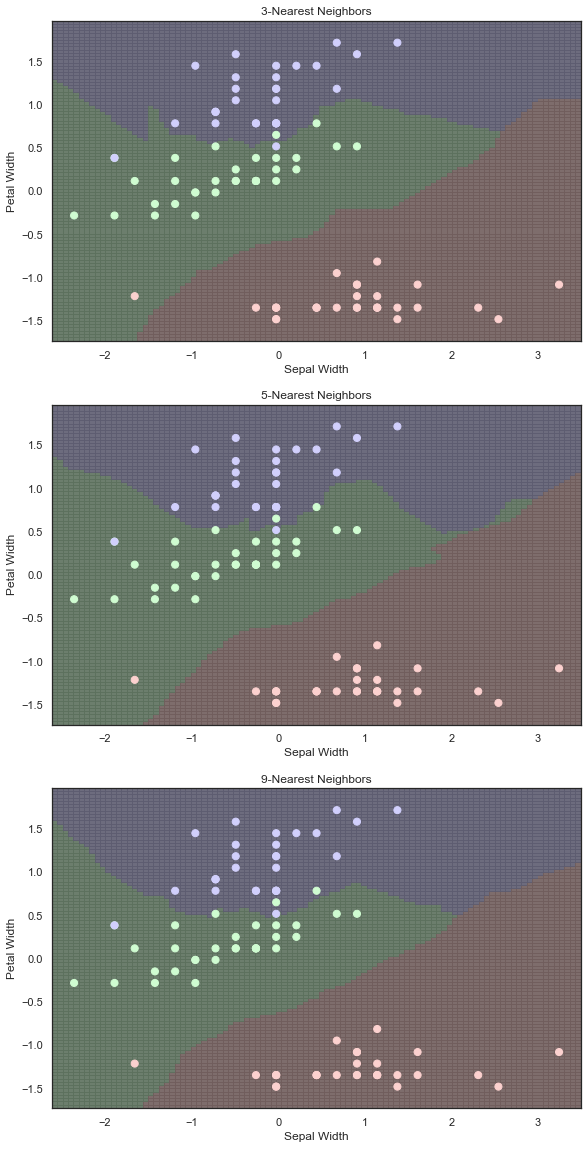

In [13]:
# Make a two-dimensional Iris data set
n_data = us.trim_data(d_train_sc, l_train)

# Construct meshgrid data
mdata = us.get_mdata(n_data)

# Show the mesh grid and training data
sns.set(style="white")
fig, axs = plt.subplots(figsize=(10,20), nrows=3, ncols=1, 
                        sharex=False)

# Iterate through different neighbor counts
for idx, nbrs in enumerate([3, 5, 9]):
    
    # Now train our model
    knc.set_params(n_neighbors=nbrs)
    
    # Now train our model
    knc.fit(n_data[:,:2], n_data[:,2])
    
    # Predict for mesh grid
    z = knc.predict(mdata)
    
    # Plot training data and mesh grid
    us.splot_data(axs[idx], n_data, mdata, z, 
                  'Sepal Width', 'Petal Width', 50)
    
    axs[idx].set_title(f'{nbrs}-Nearest Neighbors')

As the above example demonstrates, increasing the number of neighbors does not have a strong effect on the classification performance, likely due to the small size of our data. One additional point to remember, as the plots above show, we have scaled our data, thus the plot region does not correspond to the original ranges spanned by these data.

----

### Weights

The second hyperparameter that can be specified in the k-nn algorithm is the weight used to compute the statistical summary of the neighbor features. The scikit-learn neighbors module supports three different values for the weight hyperparameter:

1. By default, uniform weighting is used, which means each neighbor is treated equally.
2. The other simple choice for the weight hyperparameter is to use distance weighting, where the features from different neighbors are weighted by the inverse of their distance. Thus, closer points are weighted more than distant neighbors
3. Finally, the third option for this hyperparameter is to provide a user-defined function that accepts an array of distances and returns the appropriate weights.

The following code cell contrasts the effects of changing the weight hyperparameter on our Iris data classification. This is done by classifying the data with both the uniform and distance weights, and displaying the resulting decision surface for the same value of the number of nearest neighbors hyperparameter.

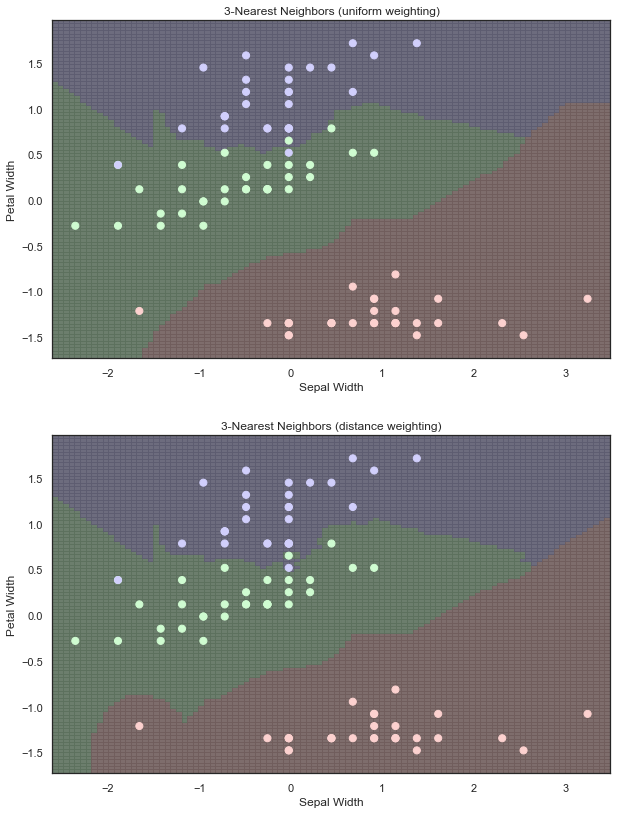

In [14]:
# Make a two-dimensional Iris data set
n_data = us.trim_data(d_train_sc, l_train)

# Construct mesh grid data
mdata = us.get_mdata(n_data)

# Show the mesh grid and training data

sns.set(style="white")
fig, axs = plt.subplots(figsize=(10,14), nrows=2, ncols=1, 
                        sharex=False)
nbrs = 3

# Iterate through different neighbor counts
for idx, weights in enumerate(['uniform', 'distance']):
    knc.set_params(n_neighbors=nbrs, weights=weights)
    
    # Now train our model
    knc.fit(n_data[:,:2], n_data[:,2])
    
    # Predict for mesh grid
    z = knc.predict(mdata)
    
    # Plot training data and mesh grid
    us.splot_data(axs[idx], n_data, mdata, z, 
                  'Sepal Width', 'Petal Width', 50)
    
    axs[idx].set_title(f'{nbrs}-Nearest Neighbors ({weights} weighting)')

As shown above, the distance weight generates a more varied decision surface that better captures the distribution of training data. While this may often be the case, a proper evaluation with more data and the use of performance metrics, such as those discussed previously, should be used for the optimal selection of all hyperparameters.

## K-Nearest Neighbors: Regression

The k-nn algorithm can be used for classification (as demonstrated previously) and for regression. To generate a regression model by using the k-nn algorithm we must create a `KNeighborsRegressor` estimator, which simply predicts a continuous value by taking the mean of the continuous labels from the nearest neighbors. Thus, while simple, this approach is often not optimal unless a large number of neighbors with many features are used.

In [15]:
#generate the data
x, y, xx = us.random_cosine(25, 40, 23)


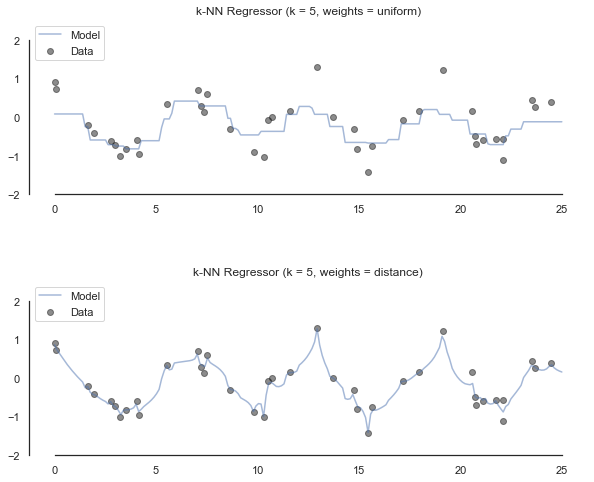

In [16]:
# Make the plots
fig, axs = plt.subplots(figsize=(10, 8.0), nrows=2, ncols=1, sharex=False)
adj = plt.subplots_adjust(hspace=0.5)

# Define k
n_neighbors = 5

# Iterate over two wegith schemes
for idx, weights in enumerate(['uniform', 'distance']):

    # Create Regressor, fit to training data, predict for new data
    knr = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knr.fit(x, y).predict(xx)
    
    # Plot data and model
    axs[idx].scatter(x, y, c='k', alpha = 0.5, label='Data')
    axs[idx].plot(xx, y_, c='b',  alpha = 0.5, label='Model')
    
    # Decorate plot appropriately
    ttl = f'k-NN Regressor (k = {n_neighbors}, weights = {weights})'
    axs[idx].set_title(ttl)
    axs[idx].set_ylim(-2, 2.5)
    axs[idx].legend(loc=2)
    sns.despine(ax=axs[idx], trim=True)

In this example, the benefit of using the `distance` weighting scheme is obvious, since this generates a weighted mean for the predicted value.